In [0]:
# 1. Load dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [0]:
# 2. Split data into a training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(cancer.data, cancer.target, random_state=42)

In [0]:
# 3. Instantiate Perceptron
from sklearn.linear_model import Perceptron

classifier = Perceptron(random_state=0)
classifier.fit(X_train, Y_train)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
# 4. Evaluating our perceptron model
accuracy = classifier.score(X_test, Y_test)
print(accuracy)

0.9020979020979021


In [0]:
Y_predicted = classifier.predict(X_test)

In [0]:
from sklearn import metrics
print(metrics.classification_report(Y_predicted, Y_test))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        40
           1       1.00      0.86      0.93       103

    accuracy                           0.90       143
   macro avg       0.87      0.93      0.89       143
weighted avg       0.93      0.90      0.91       143



Text(91.68, 0.5, 'Predicted label')

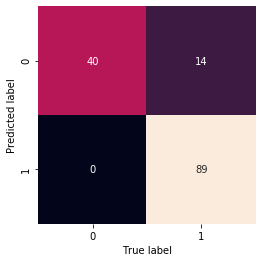

In [0]:
# Visualize confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

mat = confusion_matrix(Y_predicted, Y_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel("True label")
plt.ylabel("Predicted label")

In [0]:
# Visualize the impact of the number of training epochs on the prediction accuracy
%matplotlib inline
start_num_epochs = 1
finish_num_epochs = 10
increment_amt = 1
pred_scores = []
num_epochs = []

for epoch_count in range(start_num_epochs, finish_num_epochs+1, increment_amt):
  classifier = Perceptron(random_state=0, max_iter=epoch_count)
  classifier.fit(X_train, Y_train)
  score = classifier.score(X_test, Y_test)
  pred_scores.append(score)
  num_epochs.append(epoch_count)
#  print(epoch_count)
#  print(pred_scores)
#  print(num_epochs)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_mo

Text(0.5, 1.0, 'Impact of Training')

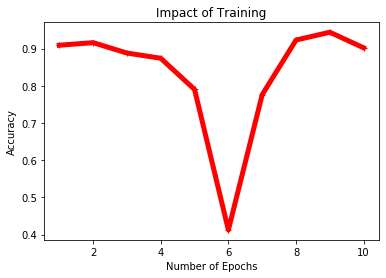

In [0]:
plt.plot(num_epochs, pred_scores, "r-+", linewidth=5)
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Impact of Training")
